# **LAB SESSION 1 - DECISION TREES**
# **CORRECTION**

## Utils

In [1]:
#conda install -c conda-forge scikit-learn, pandas 

In [2]:
#conda install seaborn

## Ex 1: introduction to classification trees

We work with the palmerpenguins dataset (see the dataset document https://allisonhorst.github.io/palmerpenguins/).
Before to start, we: 
 - load the data and look at them (display the dimension and some descriptive statistics) 
 - select the variables that we will use in the exercise, 
 - visualize the data.
 - split the dataset into a training and testing dataset (use the value 0 for the random seed) 

In [1]:
# (1) Load the data and display the dimension and a brief statistics summary
import pandas as pd # data analysis
penguins = pd.read_csv("./data/penguins.csv") 
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
1,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
2,Adelie,Torgersen,40.3,18.0,195,3250,female,2007
3,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
4,Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [2]:
penguins.shape

(333, 8)

In [3]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [5]:
# (2) Select the variables that we will use in the exercise
penguins_classif=penguins[["species","bill_length_mm","bill_depth_mm"]]

In [6]:
target_column = "species" # The response variable that we will consider
features_columns = ["bill_length_mm", "bill_depth_mm"] # The predictors/features used to predict the target

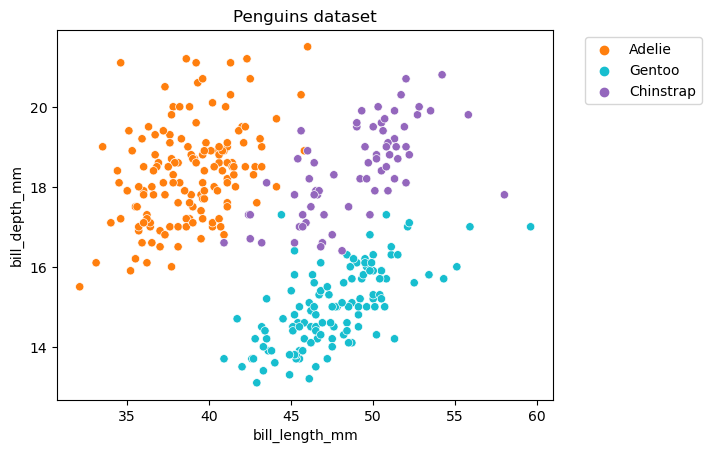

In [7]:
# (3) Visualize the dataset
import seaborn as sns
import matplotlib.pyplot as plt
palette = ["tab:orange", "tab:cyan", "tab:purple"]
ax = sns.scatterplot(data=penguins_classif, x=features_columns[0], y=features_columns[1],
                     hue=target_column, palette=palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Penguins dataset")

In [9]:
# (4) Split the dataset into train and test dataset
from sklearn.model_selection import train_test_split
data, target = penguins_classif[features_columns], penguins_classif[target_column]
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=0, test_size=0.25)

In [10]:
print(data_test.shape);print(data_test.shape)

(84, 2)
(84, 2)


**Question 1. Fit a classification tree to explain species by the length and the width of the bill and draw it. Your tree will fit the train set and will have a maximum depth of 2 (use also random_state=0).**

*random_state: parameter that controls the randomness of the estimator, used if the improvement of the criterion is identical for several splits then one split has to be selected at random).*

|--- feature_1 <= 16.35
|   |--- feature_0 <= 39.30
|   |   |--- class: Adelie
|   |--- feature_0 >  39.30
|   |   |--- class: Gentoo
|--- feature_1 >  16.35
|   |--- feature_0 <= 44.25
|   |   |--- class: Adelie
|   |--- feature_0 >  44.25
|   |   |--- class: Chinstrap



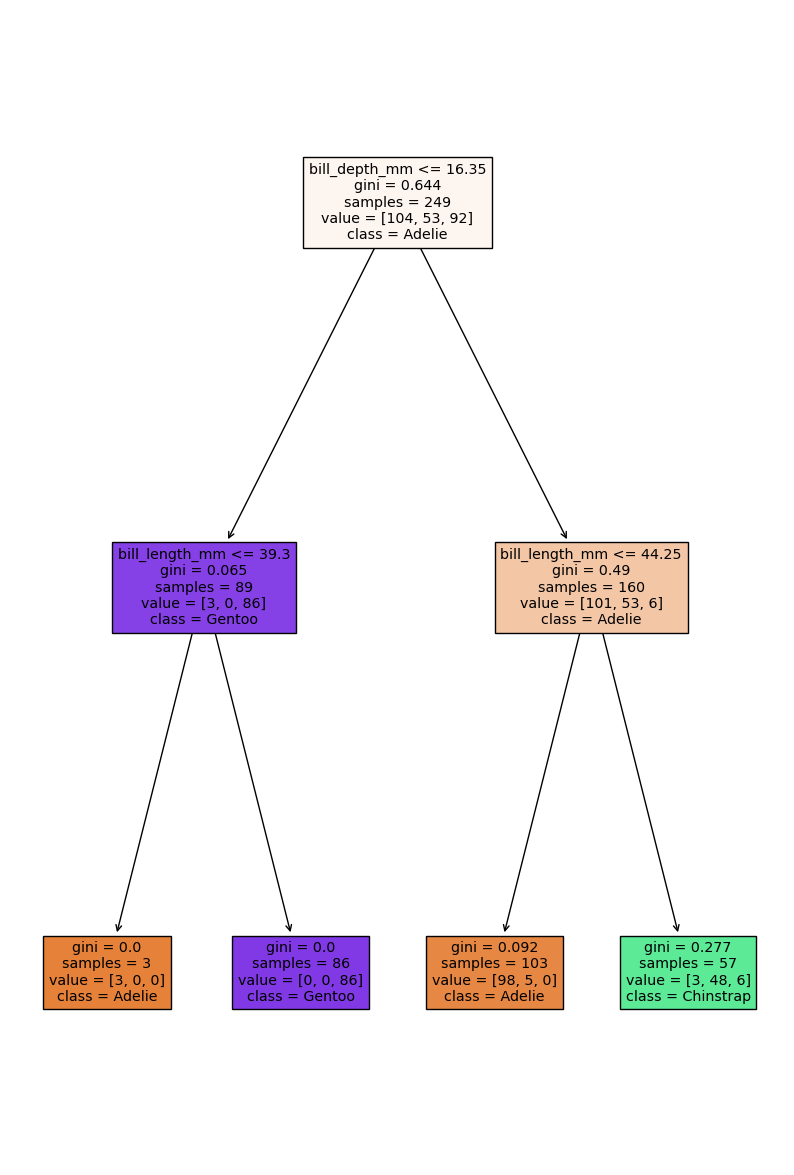

In [11]:
## Solution

# Step 1: create the object tree_clf, it is a DecisionTreeClassifier object with randomstate=0 and max_depth=2
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree_clf = DecisionTreeClassifier(random_state=0,max_depth=2)

# Step 2: build the tree on the train set by indicating the input data and the traget variable 
tree_clf.fit(data_train, target_train)

# Step 3: plot the tree (text representation)
from sklearn import tree
text_representation = tree.export_text(tree_clf)
print(text_representation)


# Step 4: plot the tree (plot the figure)
fig = plt.figure(figsize=(10,15))
tree_plot = tree.plot_tree(tree_clf,feature_names=features_columns,class_names=tree_clf.classes_,filled=True)



In [12]:
# To obtain the modality order in the tree for the target variable
tree_clf.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

**Question 2. Based on the plot of the tree, write the prediction $f_n(\mathbf x)$ associated to the tree for a new observation $\mathbf x \in \mathbb R^2$.** 
*Indication: bill_length_mm is consider as the first feature and so is denoted by $X_1$ while bill_depth_mm is the second feature and is then denoetd by $X_2$.*

**Solution:**

$$f_n(\mathbf x) = 0 \times \mathbf 1_{\lbrace x_1 \leq 16.35 ,  x_2 \leq 39.3\rbrace} + 0 \times \mathbf 1_{\lbrace x_1 > 16.35, x_2 \leq 44.25 \rbrace} + 2\times \mathbf 1_{\lbrace x_1 \leq 16.35, x_2 > 39.3 \rbrace} + 1\times \mathbf 1_{\lbrace x_1 > 16.35 , x_2 > 44.25 \rbrace}$$

**Question 3. Consider a penguin with a bill measuring 45mm (length) and 18mm (depth). What is the probability that this penguin belongs to the Adelie familly, $\mathbf P(Species =Adelie \, \vert \, x_1 = 45, x_2=18)$ ?**

**Solution:**

Based on the tree representation, we can see that the observation will fall into the fourth leaf (the green one) and in this leaf there are 57 observations whose 3 are assigned to the class Adelie. So, we can write

$$\mathbf P(Species =Adelie \, \vert \, x_1 = 45, x_2=18)= \frac{3}{57}.$$

**Question 4. Plot the data and the partition associated to the tree.**

In [13]:
range_features = {
    feature_name: (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in data.columns
}


import numpy as np

# A function to plot the partition associated to a decision tree model
def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="Pastel2")

    return ax

# Define the colors used
palette = ["tab:orange", "tab:cyan", "tab:purple"]



C:\Users\ariol\Documents\documents\CDE\UBS\JupyterEnvironment\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


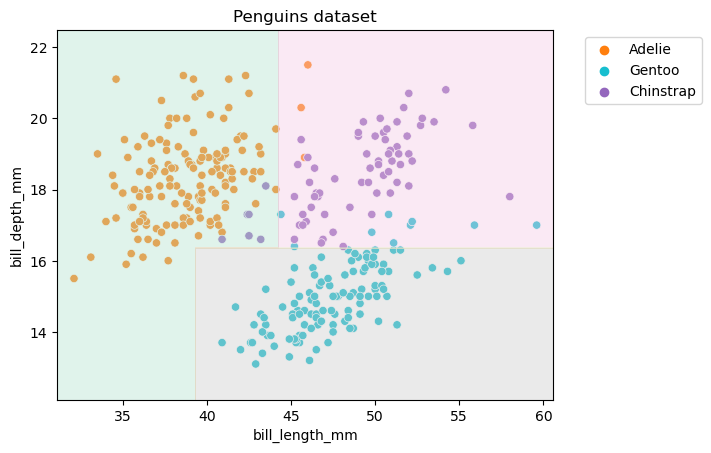

In [14]:
## Solution 

ax = sns.scatterplot(data=penguins_classif, x=features_columns[0], y=features_columns[1],hue=target_column, palette=palette)# Define the grid : the data space 
plot_decision_function(tree_clf, range_features, ax=ax) # display the tree partition
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # graphical options
_=plt.title("Penguins dataset")# graphical options

**Question 5: Look at the tree structure: nodes, impurity, spliting threshold, etc. For each line, what repsent the output ?**
*Indication: see the link https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=sklearn%20tree%20_tree%20tree
and look at the object: tree_clf.tree_*

In [15]:
## Solution
print(tree_clf.tree_.feature) # give the ordered list of the split variables. 
print(tree_clf.tree_.node_count)# give the ordered list of the split variables. 
print(tree_clf.tree_.children_left)#  id of the left child nodes (-1 if leaf node)
print(tree_clf.tree_.children_right)#  id of the right child nodes (-1 if leaf node)
print(tree_clf.tree_.impurity)# the ilmpurity in each node
print(tree_clf.tree_.threshold)# the threshold in each node


[ 1  0 -2 -2  0 -2 -2]
7
[ 1  2 -1 -1  5 -1 -1]
[ 4  3 -1 -1  6 -1 -1]
[0.64373155 0.06514329 0.         0.         0.49039062 0.0923744
 0.27700831]
[16.34999943 39.30000114 -2.         -2.         44.25       -2.
 -2.        ]


**Question 6. Predict the class of each observation of the test sample by using the tree and display the confusion matrix. Explain it. How many observations are misclassified?**

0.9523809523809523


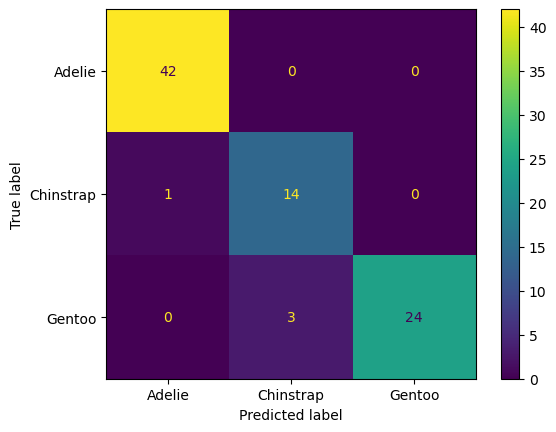

In [16]:
predictions_test = tree_clf.predict(data_test)
#print(tree_clf.predict(data_test))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(target_test, predictions_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot() 
accuracy = tree_clf.score(data_test,target_test);print(accuracy)

**Question 7. Fit a tree with a maximum depth of 5 and random_state=0. Draw the tree and compute the accuracy of this second tree on the test set. Compare the accuracy between the two trees.**

0.9761904761904762


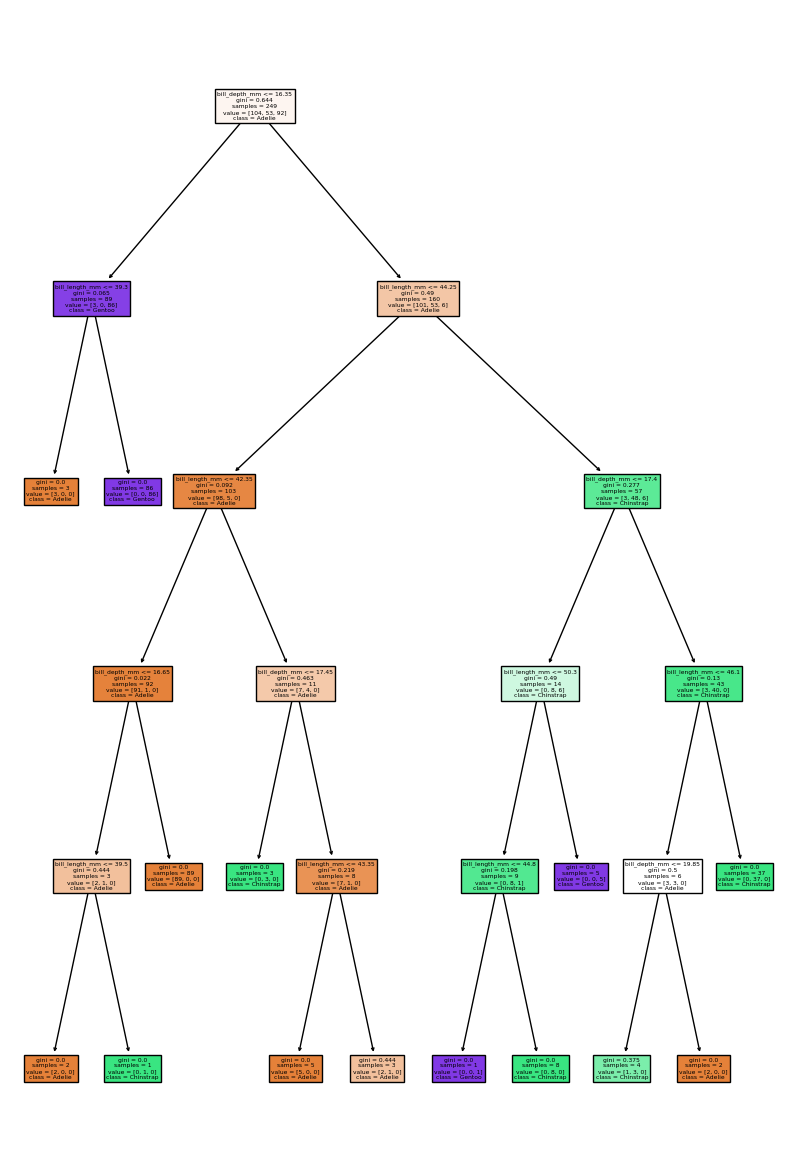

In [17]:
## Solution

# Step 1: create the object tree_clf_d5, it is a DecisionTreeClassifier object with randomstate=0 and max_depth=2
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree_clf_d5 = DecisionTreeClassifier(random_state=0,max_depth=5)

# Step 2: build the tree on the train set by indicating the input data and the traget variable 
tree_clf_d5.fit(data_train, target_train)


# Step 3: plot the tree (plot the figure)
fig = plt.figure(figsize=(10,15))
tree_plot_d5 = tree.plot_tree(tree_clf_d5,feature_names=features_columns,class_names=tree_clf.classes_,filled=True)

# Step 4: compute the accuracy of the tree using the test set
predictions_test_d5 = tree_clf_d5.predict(data_test)
accuracy_d5 = tree_clf_d5.score(data_test,target_test);print(accuracy_d5)

**Comment:** the accuray on the test set is 0.97. So, it is higher than the accuracy measured for the previous tree with max_depth=5.




**Question 8. TREE PRUNING - As we don't know what what is the best size of the tree, we will apply the cost-complexity pruning method.**
   - **a) Fit the maximum tree (don't choose any value for max_depth and use random_state=0)**
   - **b) Get the sequence of values for the cost complexity parameter (ccp_alpha)**
   - **c) Train a decision tree for each value in the sequence and store the number of nodes and the depth of each tree.**
   - **d) Compute the accuracy on both the train set and test set for each tree.**
   - **e) Draw the following plots :**
      **Plot 1 = node_count vs ccp_alpha,**
      **Plot 2 = depth vs ccp_alpha**
      **Plot 3 = accuracy vs ccp_alpha for training and testing sets.**

In [18]:
## (a) Fit the maximum tree 
from sklearn.tree import DecisionTreeClassifier, plot_tree
max_tree_clf = DecisionTreeClassifier(random_state=0)

In [19]:
## (b) Get the sequence of values for the cost complexity parameter (ccp_alpha)
path = max_tree_clf.cost_complexity_pruning_path(data_train, target_train)
ccp_alphas= path.ccp_alphas; print(ccp_alphas)

[0.         0.00301205 0.00351406 0.00397241 0.0060241  0.00713967
 0.01036705 0.01161908 0.01692831 0.02328415 0.2134878  0.30533696]


In [20]:
## c) Train a decision tree for each value in the sequence 
##    and store node_count and max_depth
tree_clfs = []
for alpha in ccp_alphas:
    tree_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    tree_clf.fit(data_train, target_train)
    tree_clfs.append(tree_clf)


tree_clfs = tree_clfs[:-1] #a list including all the decision trees for all alpha values
ccp_alphas = ccp_alphas[:-1] #a list including all alpha values


node_counts = [tree_clf.tree_.node_count for tree_clf in tree_clfs];print(node_counts)#a vector with the number of nodes for all decision trees 
depth = [tree_clf.tree_.max_depth for tree_clf in tree_clfs];print(depth)#a vector with the depth for all decision trees 

[33, 29, 25, 21, 19, 17, 15, 11, 7, 5, 3]
[7, 6, 5, 5, 5, 4, 4, 4, 2, 2, 1]


In [21]:
## (d) Compute the accuracy on both the train set and test set for each tree.
train_acc = [tree_clf.score(data_train, target_train) for tree_clf in tree_clfs]
train_acc

[1.0,
 0.9959839357429718,
 0.9919678714859438,
 0.9879518072289156,
 0.9799196787148594,
 0.9759036144578314,
 0.9759036144578314,
 0.963855421686747,
 0.9437751004016064,
 0.9317269076305221,
 0.751004016064257]

In [22]:
## (c) Train a decision tree for each value in the sequence 
##    and store node_count and max_depth
tree_clfs = []
for ccp_alpha in ccp_alphas:
    tree_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    tree_clf.fit(data_train, target_train)
    tree_clfs.append(tree_clf)


tree_clfs = tree_clfs[:-1] #a list including all the decision trees for all alpha values
ccp_alphas = ccp_alphas[:-1] #a list including all alpha values


node_counts = [tree_clf.tree_.node_count for tree_clf in tree_clfs];print(node_counts)#a vector with the number of nodes for all decision trees 
depth = [tree_clf.tree_.max_depth for tree_clf in tree_clfs];print(depth)#a vector with the depth for all decision trees 

[33, 29, 25, 21, 19, 17, 15, 11, 7, 5]
[7, 6, 5, 5, 5, 4, 4, 4, 2, 2]


In [23]:
## (d) Compute the accuracy on both the train set and test set for each tree.
train_acc = [tree_clf.score(data_train, target_train) for tree_clf in tree_clfs]
train_acc

[1.0,
 0.9959839357429718,
 0.9919678714859438,
 0.9879518072289156,
 0.9799196787148594,
 0.9759036144578314,
 0.9759036144578314,
 0.963855421686747,
 0.9437751004016064,
 0.9317269076305221]

In [24]:
test_acc = [tree_clf.score(data_test, target_test) for tree_clf in tree_clfs]
test_acc

[0.9761904761904762,
 0.9761904761904762,
 0.9761904761904762,
 0.9761904761904762,
 0.9523809523809523,
 0.9523809523809523,
 0.9761904761904762,
 0.9642857142857143,
 0.9523809523809523,
 0.9166666666666666]

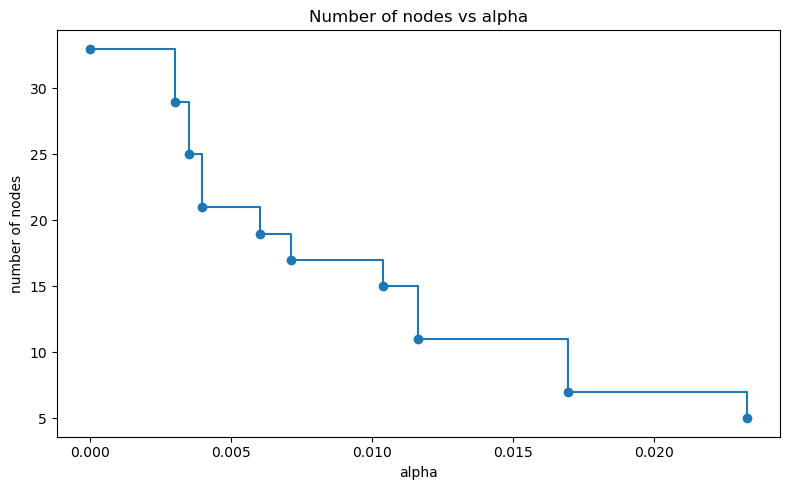

In [25]:
## (e) Plot 1

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("number of nodes")
ax.set_title("Number of nodes vs alpha")
fig.tight_layout()

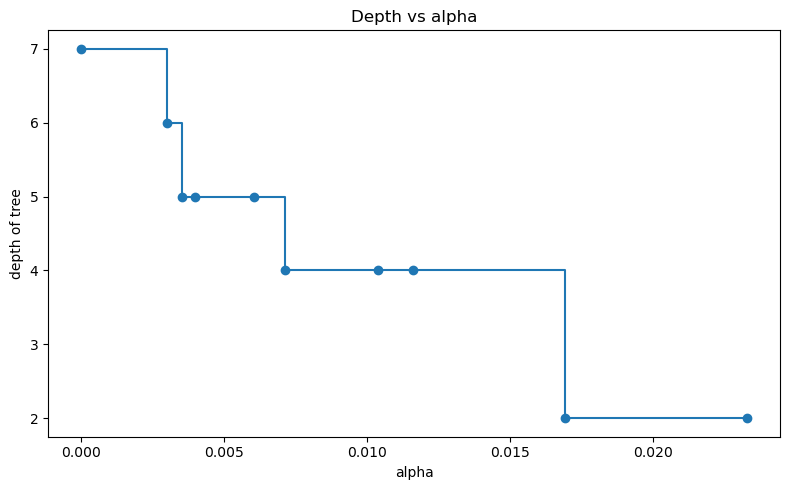

In [26]:
## (e) Plot 2

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("depth of tree")
ax.set_title("Depth vs alpha")
fig.tight_layout()

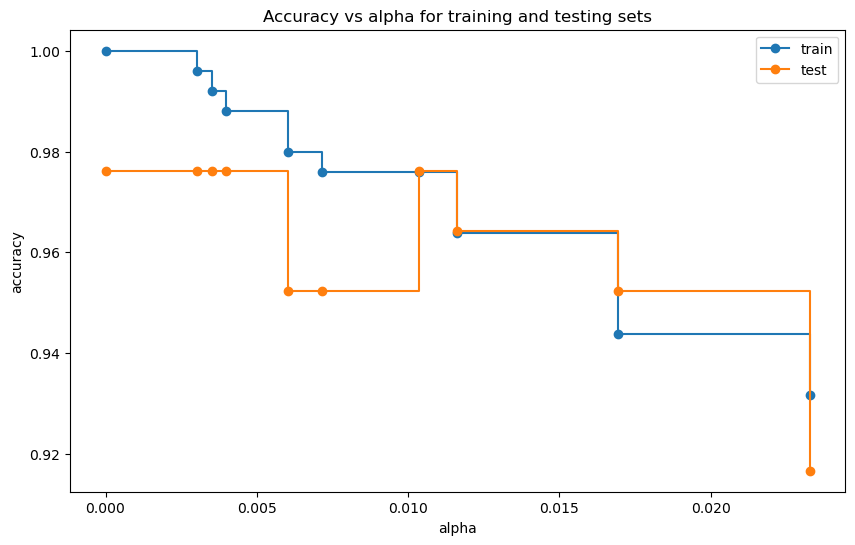

In [27]:
## (e) Plot 3
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ccp_alphas, train_acc, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_acc, marker='o', label="test",   drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.legend()
plt.show()

**Question 9. Based on Plot 3, what final tree do you select ? Justify your choice. What is the ccp_alpha value for this tree ?**  
**Then, plot the final tree. After, on another plot, plot the data and superimpose the partition associated to the final tree.** 

**Solution:** we choose the subtree in the sequence associated with the maximal accuracy mesured on the test set.
Because there are several subtrees that achieves the maximal accuracy on the test set, we choose the smalllest one.



(array([0, 1, 2, 3, 6], dtype=int64),)
[0.         0.00301205 0.00351406 0.00397241 0.01036705]


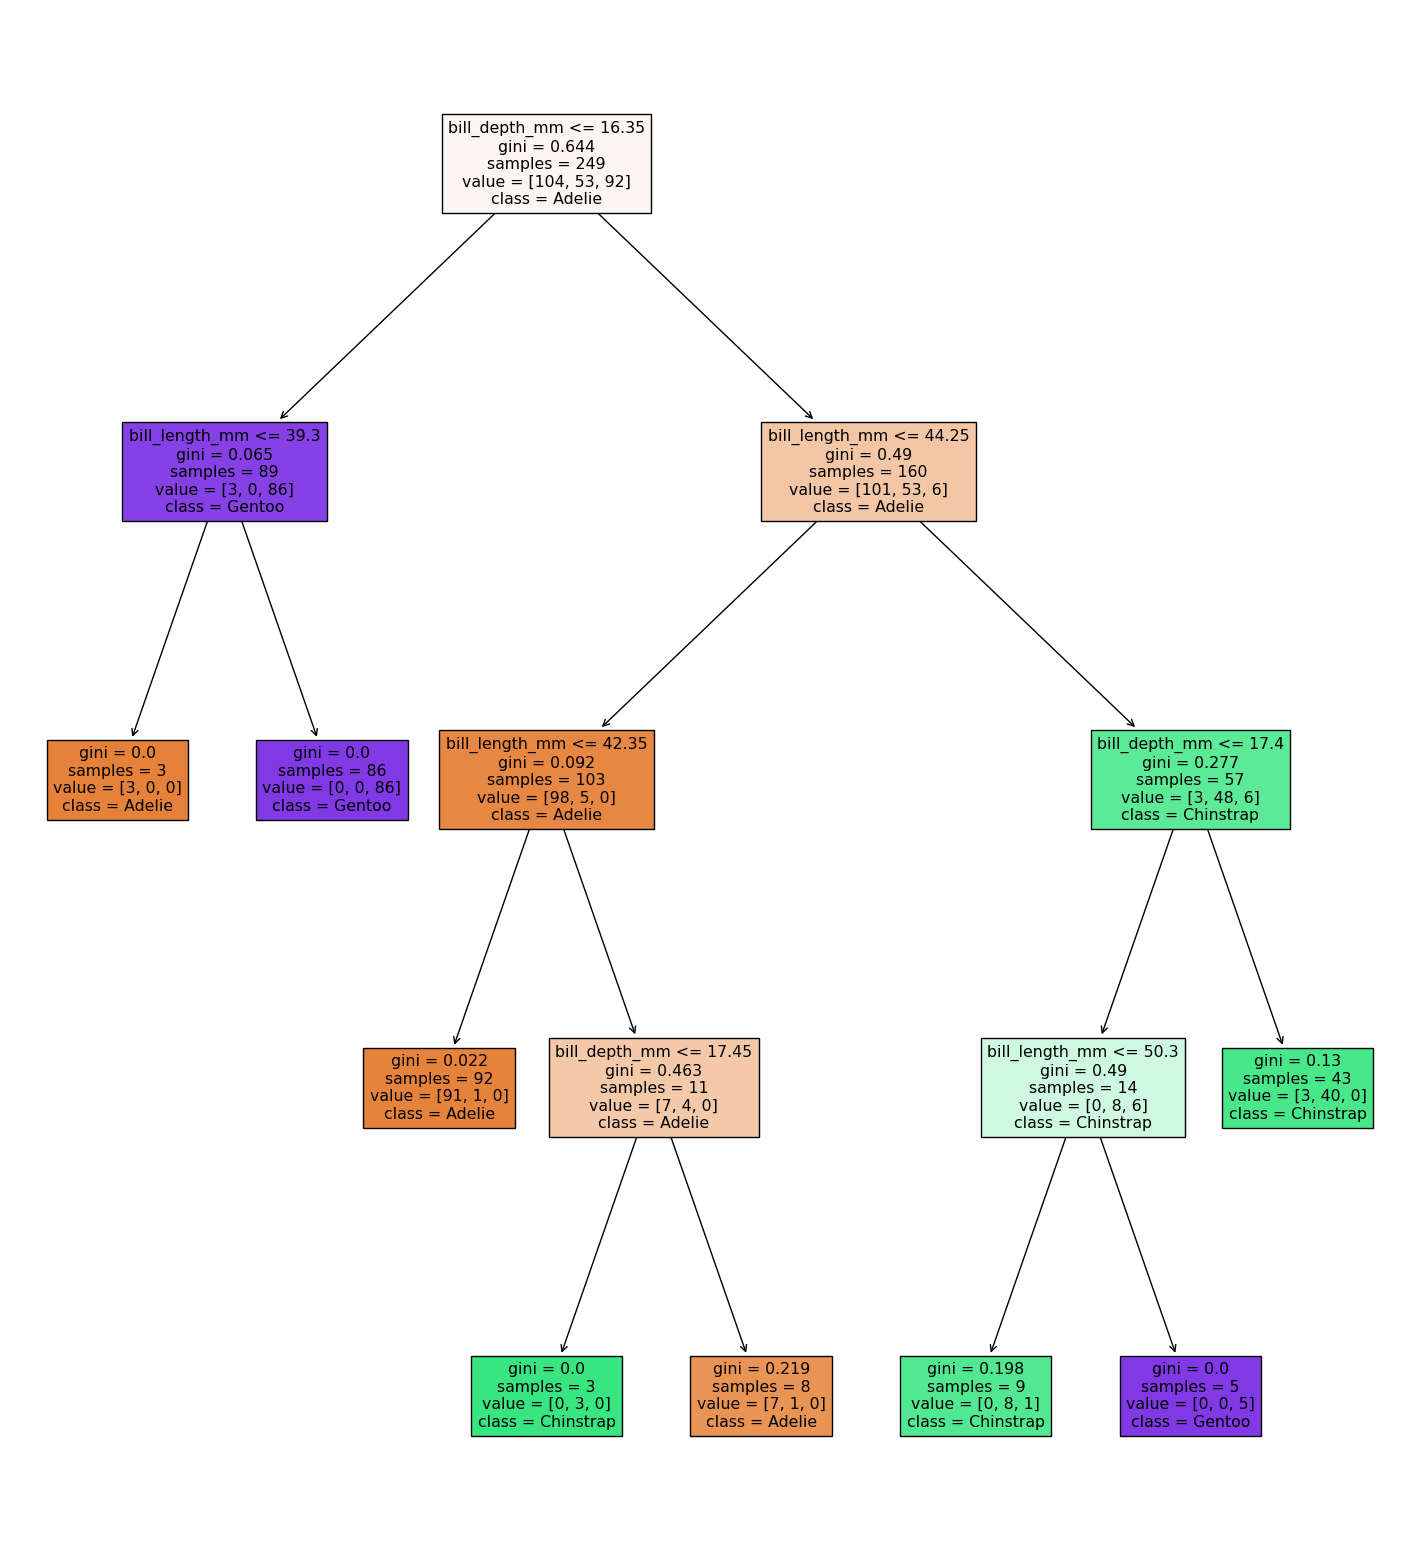

In [28]:
# The commands to select the final tree

index=np.where(test_acc==max(test_acc))# find the index for the alpha values that maximize the accuracy on the test set
print(index)
best_alpha=ccp_alphas[index]; print(best_alpha)# choose the 'best alpha' (There are several values for alpha that maximize the accuracy and the test set. 
#So the best value for alpha is the one that is associated to the smallest tree and associate to the simplest tree)

final_tree_clf = tree_clfs[6] #the final tree
fig = plt.figure(figsize=(18,20))
final_tree_plot= tree.plot_tree(final_tree_clf,feature_names=features_columns,class_names=final_tree_clf.classes_,filled=True)# display the final tree



C:\Users\ariol\Documents\documents\CDE\UBS\JupyterEnvironment\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Penguins dataset')

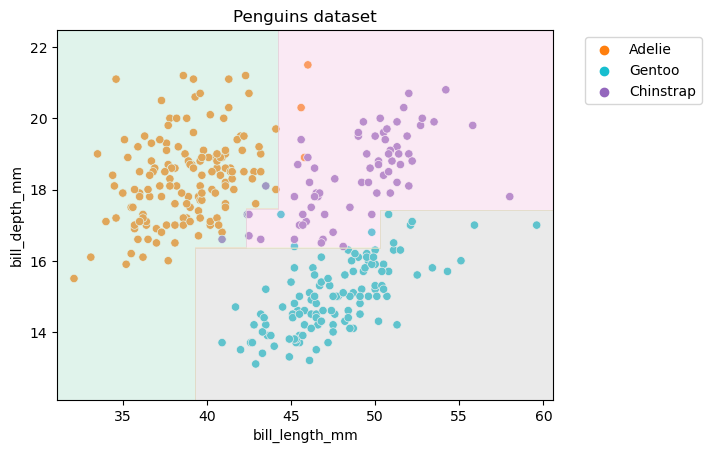

In [29]:
palette = ["tab:orange", "tab:cyan", "tab:purple"]
ax = sns.scatterplot(data=penguins_classif, x=features_columns[0], y=features_columns[1],
                     hue=target_column, palette=palette)
plot_decision_function(final_tree_clf, range_features, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Penguins dataset")

## Ex 2: introduction to regression trees

We work with the iris dataset (see the dataset documentation https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).
Before to start, we: 
 - load the data and look at them (dimension, attributes, statistic summary), 
 - select the variables that we will use in the exercise (predictor/feature = sepal length, target = petal length), 
 - plot the data (x-axis = sepal length, y-axis = petal length).
 - split the dataset into a training and testing dataset (use random.state=0 and test_size=0.3)

In [30]:
# (1) Load the data and look at them (dimension, attributes, statistic summary)
import pandas as pd # data analysis
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [31]:
# (2) Select the variables that we will use in the exercise

X = pd.DataFrame(iris.data[:,2],columns=['Petal length'])# Petal length
Y = pd.DataFrame(iris.data[:,3], columns=['Petal width']) # Petal width
data = pd.concat([X,Y], axis=1)
X_column=['Petal length']
data.head(10)

,Petal length,Petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


Text(0.5, 1.0, 'Iris dataset')

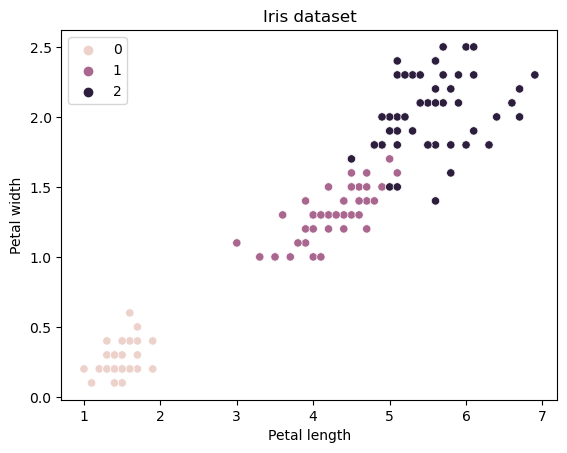

In [32]:
# (3) Plot the data

ax2 = sns.scatterplot(data=data,x="Petal length", y="Petal width", hue=iris.target)
plt.title('Iris dataset') 

In [33]:
# (4) Split the dataset into train and test dataset

##---- Solution
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.3)

**Question 1. Fit a regression tree and a linear model to explain the petal width by the petal length. Plot the tree. Your tree will be fit on the train set and will have a maximum depth of 3.**

In [34]:
##----- Write your answer here -----##
## Help: 
## - import LinearRegression from sklearn.linear_model
## - DecisionTreeRegressor from sklearn.tree

In [35]:
## Solution
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

linear_regression = LinearRegression()
tree_reg = DecisionTreeRegressor(max_depth=3)

lr= linear_regression.fit(X_train, Y_train)
tr=tree_reg.fit(X_train, Y_train)

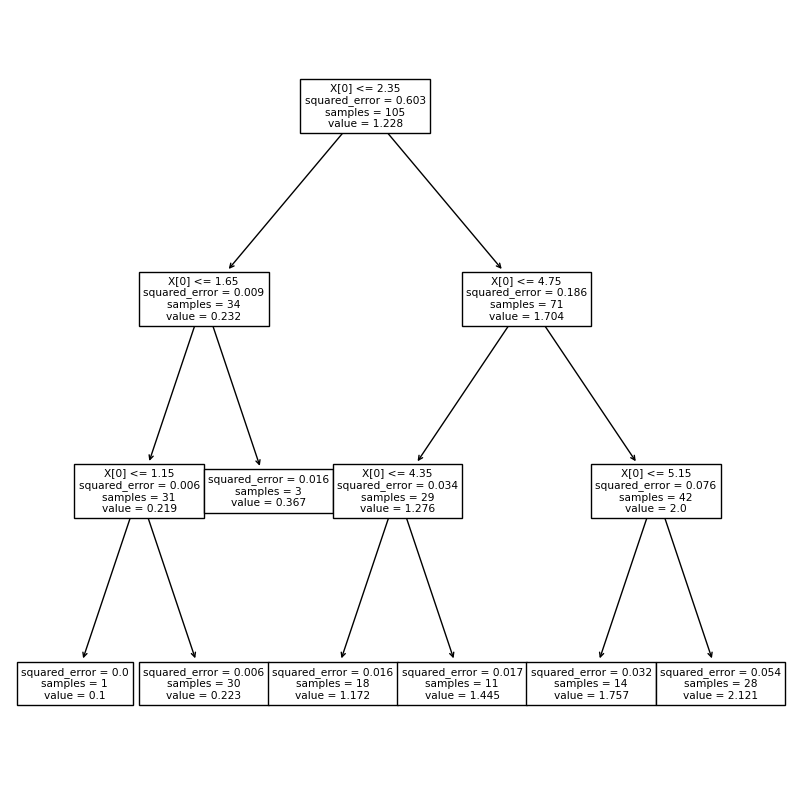

In [36]:
plt.figure(figsize=(10,10))
plot_tree(tr)
plt.show()


**Question 2. Based on the plot of the tree, write the prediction function $f$ associated to the regression tree.**
*Indication: you can use the text representation of the tree.*

In [37]:
##----- You can use the text representation of the tree
text_representation =tree.export_text(tr)
print(text_representation)

|--- feature_0 <= 2.35
|   |--- feature_0 <= 1.65
|   |   |--- feature_0 <= 1.15
|   |   |   |--- value: [0.10]
|   |   |--- feature_0 >  1.15
|   |   |   |--- value: [0.22]
|   |--- feature_0 >  1.65
|   |   |--- value: [0.37]
|--- feature_0 >  2.35
|   |--- feature_0 <= 4.75
|   |   |--- feature_0 <= 4.35
|   |   |   |--- value: [1.17]
|   |   |--- feature_0 >  4.35
|   |   |   |--- value: [1.45]
|   |--- feature_0 >  4.75
|   |   |--- feature_0 <= 5.15
|   |   |   |--- value: [1.76]
|   |   |--- feature_0 >  5.15
|   |   |   |--- value: [2.12]



**Solution:**

$$
\begin{align}
f_n(\mathbf x) \;= \; &0.1 \times \mathbf 1_{\lbrace x \leq 1.15\rbrace} +\\
&0.223 \times \mathbf 1_{\lbrace  1.15 < x \leq 1.65\rbrace} +\\
& 1.172 \times \mathbf 1_{\lbrace  2.35 < x \leq 4.35\rbrace} +\\
& 1.445 \times \mathbf 1_{\lbrace  4.35 < x \leq 4.75\rbrace} +\\
& 1.757 \times \mathbf 1_{\lbrace  4.75 < x \leq 5.15\rbrace} +\\
& 2.121 \times \mathbf 1_{\lbrace  5.15 < x \rbrace} 
\end{align}$$




**Question 3. Compute the predictions of both models on the test set.** 

In [38]:
# Solution
lr_pred=lr.predict(X_test)
#print(lr_pred)
tr_pred=tr.predict(X_test)
#print(tr_pred)

**Question 4. Display the data using a scatter plot and superimpose as two lines the predictions of both the models.** 

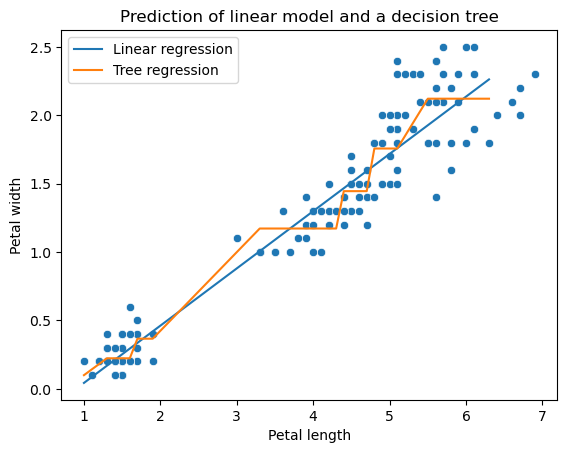

In [39]:
# Solution

X_test_sorted= X_test.sort_values(by='Petal length')
ax2=sns.scatterplot(data=data,x="Petal length", y="Petal width")
plt.plot(X_test_sorted, lr.predict(X_test_sorted),label="Linear regression")
plt.plot(X_test_sorted, tr.predict(X_test_sorted),label="Tree regression")
plt.legend()
_ = plt.title("Prediction of linear model and a decision tree")

**Question 5. Compute the error for both the models. Interpret the results.**

In [40]:
# solution

# Return the coefficient of determination of the prediction 
# => we want the model with the maximal coefficient of determination
# See: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# See: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
print(lr.score(X_test,Y_test))
print(tr.score(X_test,Y_test))

# Return the RMSE => we want the model with the smallest RMSE
from sklearn import metrics
print("RMSE tree:",round(metrics.mean_squared_error(Y_test, tr_pred),3))
print("RMSE linear reg:",round(metrics.mean_squared_error(Y_test, lr_pred),3))

0.8956126694950287
0.8925980108597651
RMSE tree: 0.055
RMSE linear reg: 0.053


**Comment:** the model are quite equivalent. The coefficient of determination and the RMSE are very similar for the two models.